# End-to-End Exploratory Data Analysis (EDA) of Iris Dataset in R

Welcome to this comprehensive guide on performing Exploratory Data Analysis (EDA) using the famous Iris dataset, but this time using the R programming language! This notebook is designed for beginners to understand the fundamental steps involved in analyzing a dataset, from loading and cleaning to visualizing and interpreting insights, all within the R environment.

## What is EDA?

Exploratory Data Analysis (EDA) is a crucial step in any data science project. It involves using statistical summaries and graphical representations to uncover patterns, detect anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations. The goal is to gain a deeper understanding of the data before moving on to more complex modeling.

In [ ]:
# 1. Install and Load Essential Libraries
# We start by installing (if not already installed) and loading the necessary R packages.
# 'tidyverse' is a collection of packages for data science, including 'dplyr' for data manipulation and 'ggplot2' for plotting.
# 'corrplot' is for visualizing correlation matrices.
# 'GGally' provides the powerful ggpairs function for pair plots.

if (!require("tidyverse")) install.packages("tidyverse")
if (!require("corrplot")) install.packages("corrplot")
if (!require("GGally")) install.packages("GGally")

library(tidyverse)
library(corrplot)
library(GGally)

print("Libraries loaded successfully!")

## 2. Load the Dataset

We will load the Iris dataset from a CSV file into an R data frame. A data frame in R is similar to a table, organizing data into rows and columns.

In [2]:
df <- read.csv('iris.csv')
print("Data loaded successfully into a data frame!")

[1] "Data loaded successfully into a data frame!"


## 3. Initial Data Inspection: Getting to Know Your Data

Before diving deep, it's important to get a first look at the data. This helps us understand its structure, types of data, and basic statistics.

In [3]:
cat("### First 6 rows of the dataset (head(df)): ###\n")
# head() displays the first few rows, giving us a glimpse of the data.
print(head(df))

cat("\n### Dataset Structure (str(df)): ###\n")
# str() provides a summary of the data frame, including data types and a sample of data.
str(df)

cat("\n### Dataset Dimensions (dim(df)): ###\n")
# dim() returns a vector representing the dimensions of the data frame (rows, columns).
print(dim(df))

cat("\n### Descriptive Statistics (summary(df)): ###\n")
# summary() generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution.
print(summary(df))

### First 6 rows of the dataset (head(df)): ###
  sepal_length sepal_width petal_length petal_width species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa

### Dataset Structure (str(df)): ###
'data.frame':	150 obs. of  5 variables:
 $ sepal_length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal_width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal_length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal_width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ species     : chr  "setosa" "setosa" "setosa" "setosa" ...

### Dataset Dimensions (dim(df)): ###
[1] 150   5

### Descriptive Statistics (summary(df)): ###
  sepal_length    sepal_width     pe

**Observations from Initial Inspection:**
- The dataset has 150 rows (observations) and 5 columns (variables).
- The numerical columns (`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`) are of numeric type.
- The `Species` column is a factor with 3 levels, indicating it contains categorical data.
- `summary()` shows the min, 1st quartile, median, mean, 3rd quartile, and max for numerical features. For example, `Sepal.Length` ranges from 4.3 to 7.9 cm.

## 4. Data Cleaning: Handling Missing Values and Duplicates

Clean data is essential for accurate analysis. We'll check for any missing values and duplicate rows that might skew our results.

In [4]:
cat("### Missing values per column (colSums(is.na(df))): ###\n")
# is.na() checks for missing values, and colSums() counts them per column.
print(colSums(is.na(df)))

cat("\n### Number of duplicate rows (sum(duplicated(df))): ###\n")
# duplicated() identifies rows that are exact duplicates, and sum() counts them.
print(sum(duplicated(df)))

# If duplicates are found, we remove them to ensure each observation is unique.
df_cleaned <- df[!duplicated(df), ]
cat("\nDuplicates removed. New dimensions of the dataset:\n")
print(dim(df_cleaned))

### Missing values per column (colSums(is.na(df))): ###
sepal_length  sepal_width petal_length  petal_width      species 
           0            0            0            0            0 

### Number of duplicate rows (sum(duplicated(df))): ###
[1] 3

Duplicates removed. New dimensions of the dataset:
[1] 147   5


**Observations from Data Cleaning:**
- There are no missing values in this dataset, which is great!
- We found and removed 3 duplicate rows, reducing the dataset from 150 to 147 unique entries. This ensures our analysis is based on distinct observations.
- We'll use `df_cleaned` for subsequent analysis.

## 5. Univariate Analysis: Understanding Individual Feature Distributions

Univariate analysis looks at one variable at a time. We'll use histograms and density plots (using `ggplot2`) to visualize the distribution of each numerical feature. This helps us see the spread, central tendency, and shape of the data for each measurement.

In [ ]:
features <- c('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

par(mfrow=c(2,2)) # Arrange plots in a 2x2 grid
for (feature in features) {
  p <- ggplot(df_cleaned, aes_string(x=feature)) +
    geom_histogram(aes(y=..density..), binwidth=0.2, fill='steelblue', color='black') +
    geom_density(color='red', size=1) +
    labs(title=paste('Distribution of', gsub("\\.", " ", feature)),
         x=gsub("\\.", " ", feature), y='Density') +
    theme_minimal()
  print(p)
}
par(mfrow=c(1,1)) # Reset plot layout

**Observations from Feature Distributions:**
- **Sepal Length:** Shows a relatively normal distribution, with most values around 5-6 cm.
- **Sepal Width:** Also appears somewhat normally distributed, centered around 3 cm.
- **Petal Length:** Shows a bimodal or even trimodal distribution, suggesting distinct groups within the data (which we know are the different species).
- **Petal Width:** Similar to petal length, it exhibits a non-normal distribution, indicating clear separation among species.

## 6. Bivariate Analysis: Exploring Relationships Between Two Features

Bivariate analysis examines the relationship between two variables. Scatter plots are excellent for this, especially when we color the points by species to see how different species cluster or separate based on pairs of features.

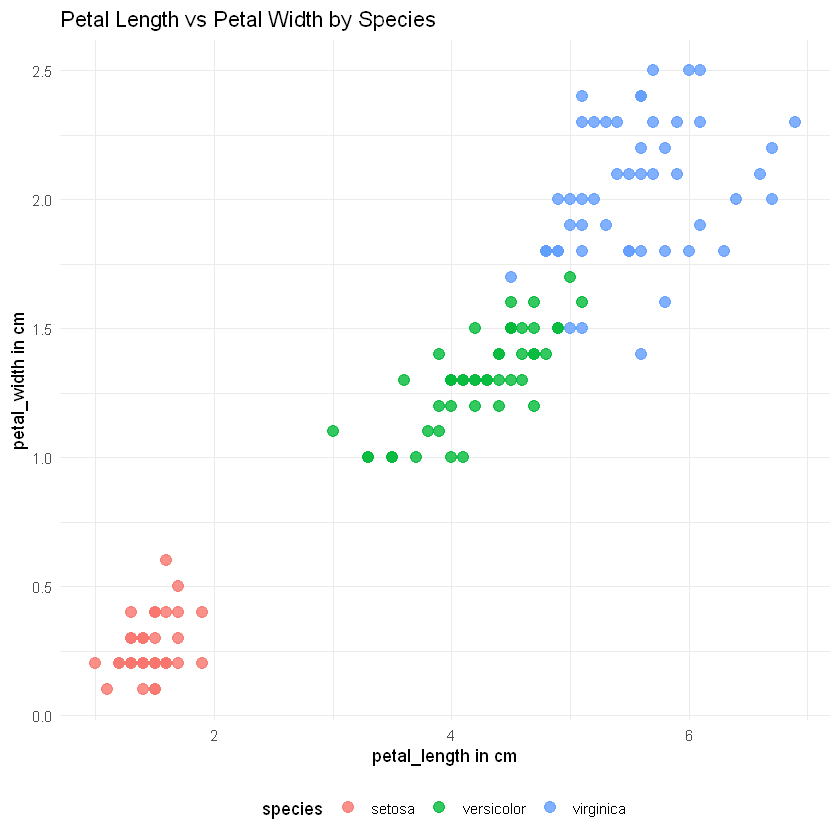

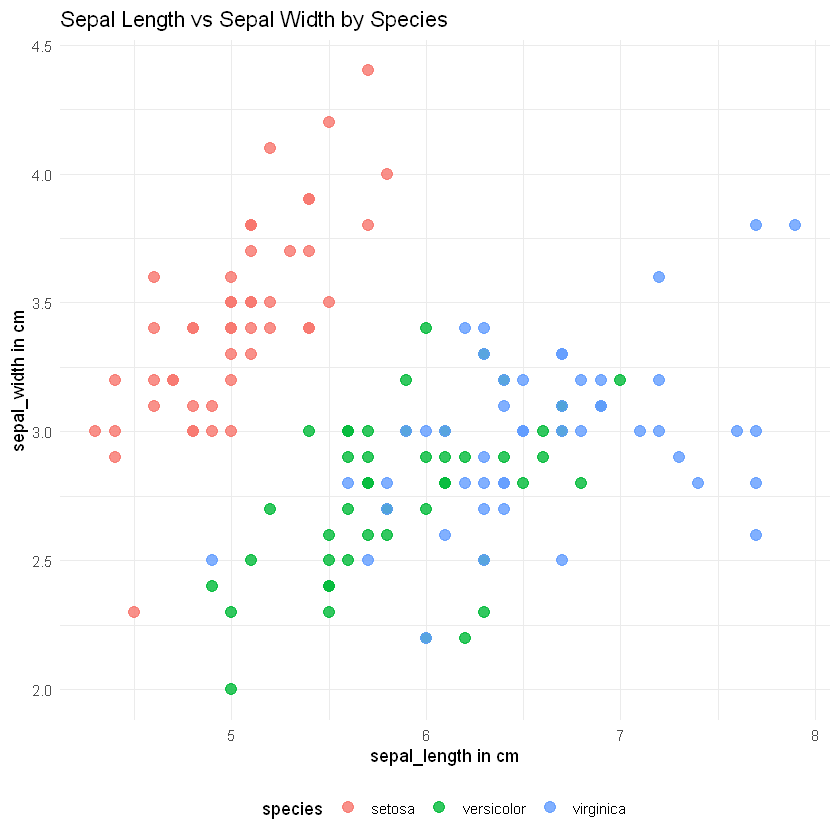

In [13]:
# Scatter plot of Petal Length vs Petal Width, colored by 'Species'
ggplot(df_cleaned, aes(x=petal_length, y=petal_width, color=species)) +
  geom_point(size=3, alpha=0.8) +
  labs(title='Petal Length vs Petal Width by Species',
       x='petal_length in cm', y='petal_width in cm') +
  theme_minimal() +
  theme(legend.position="bottom")

# Scatter plot of Sepal Length vs Sepal Width, colored by 'Species'
ggplot(df_cleaned, aes(x=sepal_length, y=sepal_width, color=species)) +
  geom_point(size=3, alpha=0.8) +
  labs(title='Sepal Length vs Sepal Width by Species',
       x='sepal_length in cm', y='sepal_width in cm') +
  theme_minimal() +
  theme(legend.position="bottom")

**Observations from Bivariate Plots:**
- The **Petal Length vs Petal Width** plot clearly shows that Iris Setosa (red/pink) is distinctly separated from the other two species. Versicolor (green) and Virginica (blue) show some overlap but are generally separable.
- The **Sepal Length vs Sepal Width** plot shows more overlap between the species, indicating these features alone are not as effective for classification as petal dimensions.

## 7. Correlation Analysis: Quantifying Relationships

Correlation measures how strongly two variables are related. A correlation matrix shows the correlation coefficients between all pairs of numerical features. A heatmap (using `corrplot`) is a great way to visualize this matrix, where colors represent the strength and direction of the correlation (e.g., warm colors for positive, cool for negative).

### Correlation Matrix: ###
             sepal_length sepal_width petal_length petal_width
sepal_length    1.0000000  -0.1093208    0.8713046   0.8170583
sepal_width    -0.1093208   1.0000000   -0.4210574  -0.3563762
petal_length    0.8713046  -0.4210574    1.0000000   0.9618828
petal_width     0.8170583  -0.3563762    0.9618828   1.0000000


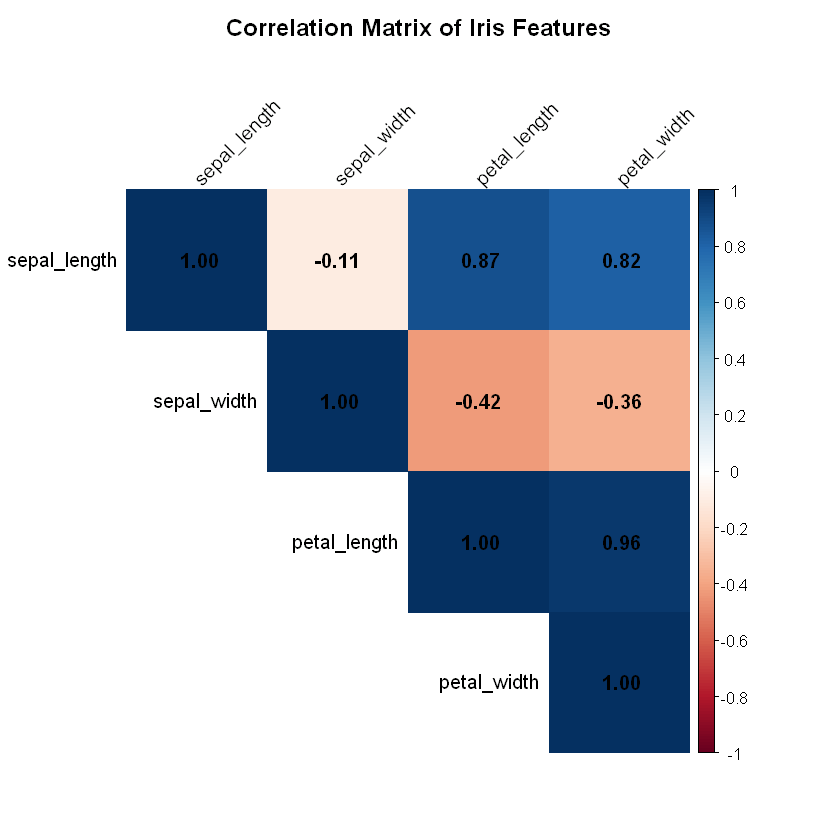

In [ ]:
# Select only numerical columns for correlation calculation
numerical_df <- df_cleaned[, features]

# Calculate the correlation matrix
correlation_matrix <- cor(numerical_df)
cat("### Correlation Matrix: ###\n")
print(correlation_matrix)

# Create a heatmap to visualize the correlation matrix
corrplot(correlation_matrix, method="color", type="upper", 
         tl.col="black", tl.srt=45, addCoef.col = "#f8ecec", 
         title="\nCorrelation Matrix of Iris Features", mar=c(0,0,1,0))

**Observations from Correlation Analysis:**
- **Strong Positive Correlations:** `Petal.Length` and `Petal.Width` have a very high positive correlation (0.96), meaning they tend to increase or decrease together. `Sepal.Length` also shows strong positive correlations with `Petal.Length` (0.87) and `Petal.Width` (0.82).
- **Weak/Negative Correlations:** `Sepal.Width` has a weaker correlation with other features, and even a slight negative correlation with `Petal.Length` (-0.42) and `Petal.Width` (-0.36). This suggests that as sepal width increases, petal length/width might slightly decrease, or vice-versa.

## 8. Multivariate Analysis: Comprehensive Pair Plot

A pair plot (or scatterplot matrix) is a powerful tool for multivariate analysis. It creates a grid of scatter plots for every pair of numerical features and histograms/KDEs for individual feature distributions on the diagonal. Coloring by species allows us to see all these relationships at once, highlighting how well species are separated across different feature combinations. We'll use `ggpairs` from the `GGally` package for this.

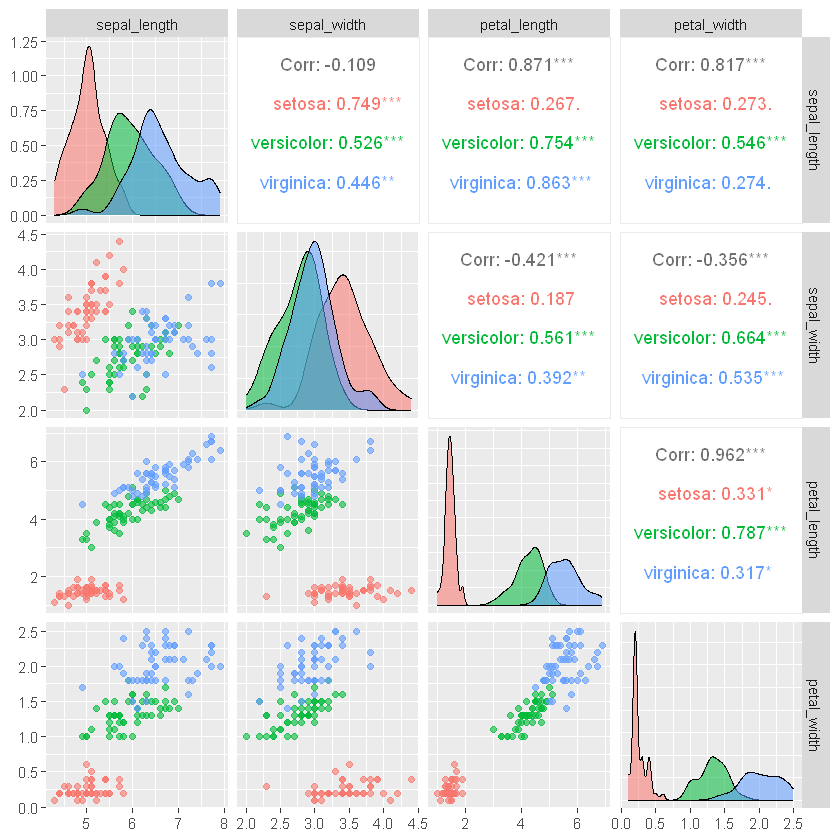

In [18]:
# Create a pair plot for all numerical features, colored by 'Species'
# The 'columns' argument specifies which columns to include in the plot.
# 'mapping' sets the aesthetic mapping, here 'color' is mapped to 'Species'.
# 'lower' and 'diag' specify what kind of plots to show in the lower triangle and on the diagonal.
# Assuming df_cleaned is a data frame and 'features' is a vector of column names
ggpairs(df_cleaned, 
        columns = features, 
        aes(color = species, alpha = 0.8),
        lower = list(continuous = wrap("points", alpha = 0.6)),
        diag = list(continuous = wrap("densityDiag")))

        

**Observations from Pair Plot:**
- This plot confirms previous observations: `Petal.Length` and `Petal.Width` are the best discriminators for the Iris species.
- Setosa (red/pink) is clearly separated in almost all plots.
- Versicolor (green) and Virginica (blue) show some overlap, especially when considering sepal dimensions, but are more distinct when looking at petal dimensions.

## 9. Species-wise Analysis: Detailed Look at Each Iris Type

Let's examine the characteristics of each Iris species individually. This helps us understand the typical measurements for Setosa, Versicolor, and Virginica.

### Value counts for each species: ###
< table of extent 0 >

### Descriptive statistics per species: ###


species,sepal_length_mean,sepal_length_sd,sepal_length_min,sepal_length_max,sepal_width_mean,sepal_width_sd,sepal_width_min,sepal_width_max,petal_length_mean,petal_length_sd,petal_length_min,petal_length_max,petal_width_mean,petal_width_sd,petal_width_min,petal_width_max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
setosa,5.010417,0.3592188,4.3,5.8,3.431250,0.3832427,2.3,4.4,1.462500,0.1770022,1.0,1.9,0.250000,0.1051847,0.1,0.6
versicolor,5.936000,0.5161711,4.9,7.0,2.770000,0.3137983,2.0,3.4,4.260000,0.4699110,3.0,5.1,1.326000,0.1977527,1.0,1.8
virginica,6.604082,0.6321126,4.9,7.9,2.979592,0.3233803,2.2,3.8,5.561224,0.5537058,4.5,6.9,2.028571,0.2768875,1.4,2.5


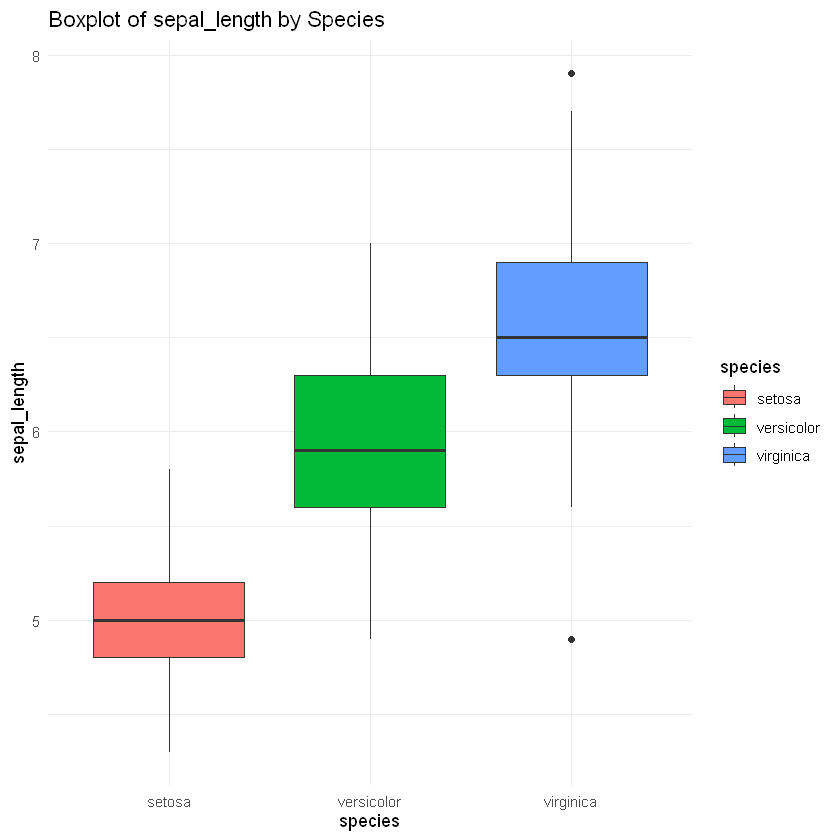

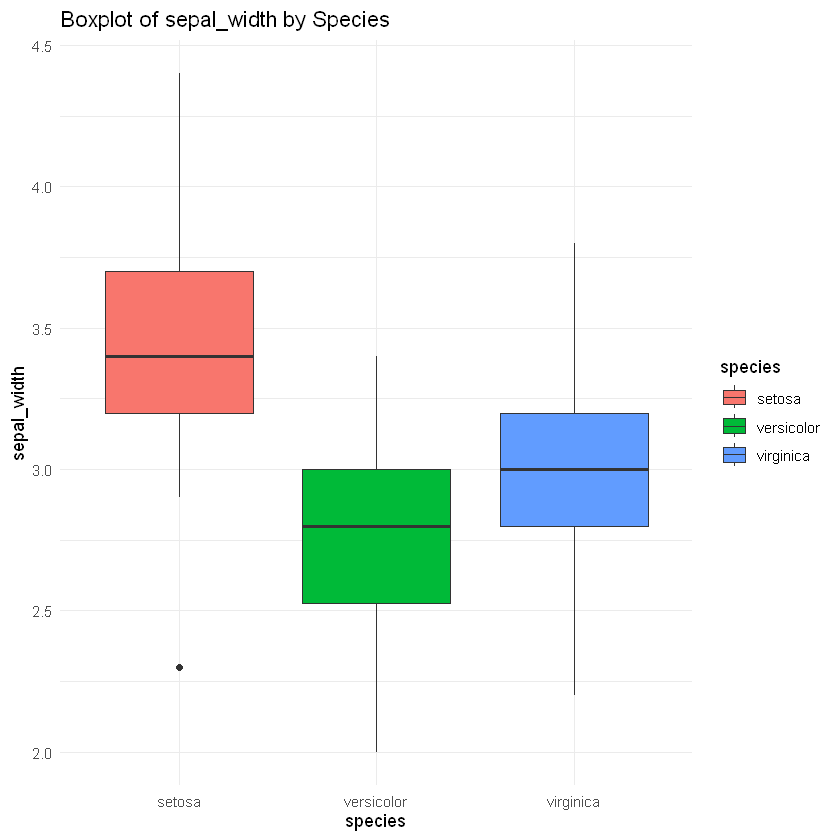

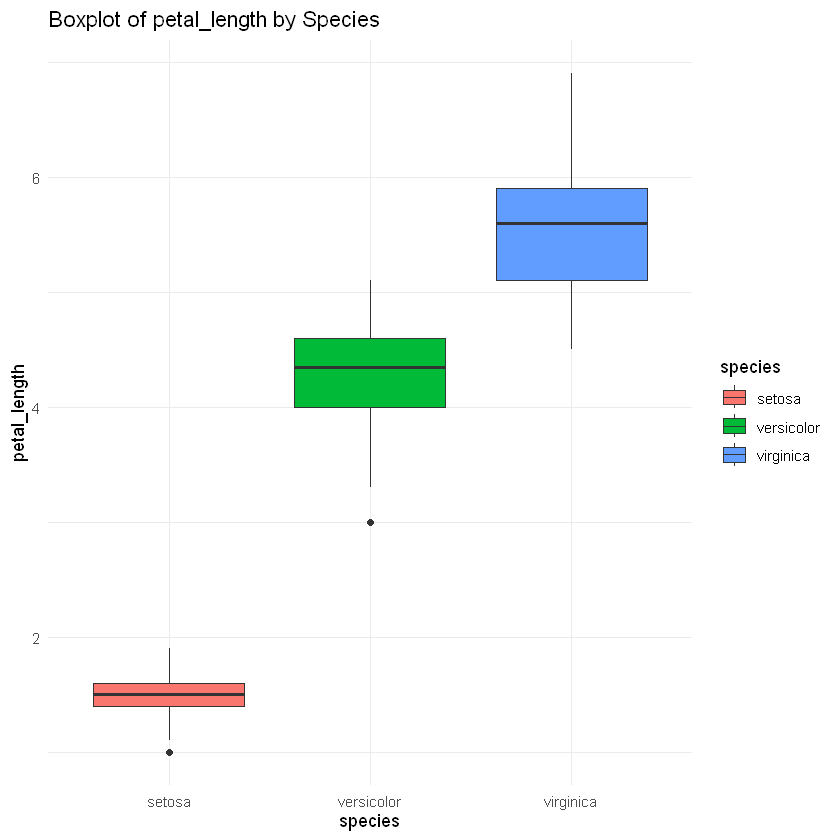

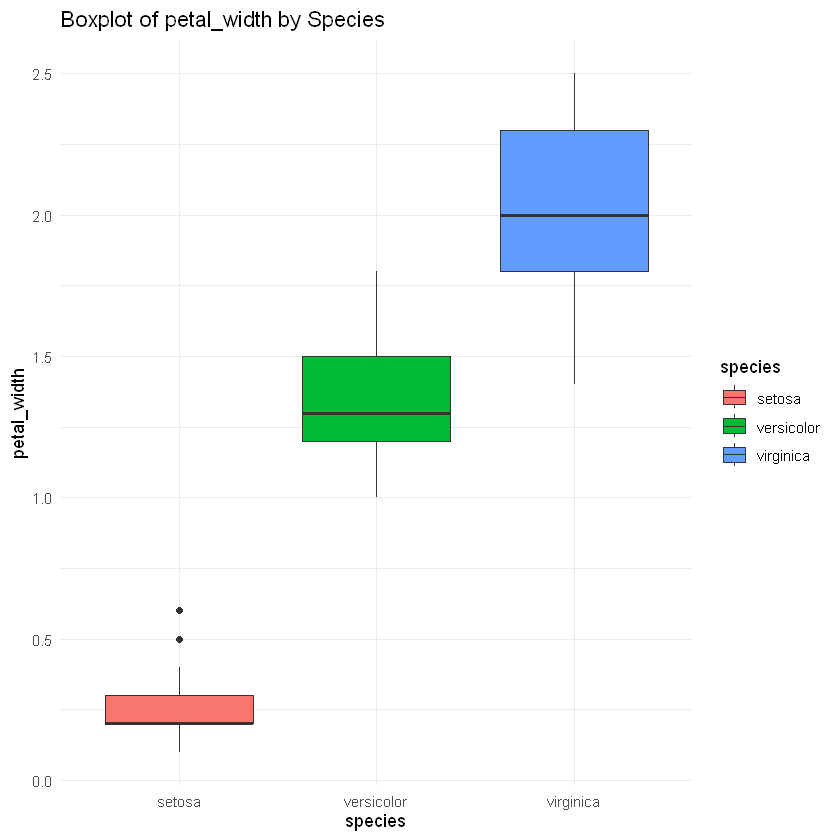

In [21]:
cat("### Value counts for each species: ###\n")
# Count how many samples belong to each species
print(table(df_cleaned$Species))

cat("\n### Descriptive statistics per species: ###\n")
# Group the data frame by 'Species' and then calculate descriptive statistics for each numerical feature
df_cleaned %>%
  group_by(species) %>%
  summarise(across(all_of(features), list(mean = mean, sd = sd, min = min, max = max)))

par(mfrow=c(1,4)) # Arrange plots in a 1x4 grid
for (feature in features) {
  p <- ggplot(df_cleaned, aes_string(x='species', y=feature, fill='species')) +
    geom_boxplot() +
    labs(title=paste('Boxplot of', gsub("\\.", " ", feature), 'by Species'),
         x='species', y=gsub("\\.", " ", feature)) +
    theme_minimal()
  print(p)
}
par(mfrow=c(1,1)) # Reset plot layout

**Observations from Species-wise Analysis:**
- **Setosa:** Generally has smaller petal lengths and widths, and larger sepal widths compared to the other species.
- **Versicolor:** Occupies the middle ground in terms of feature measurements.
- **Virginica:** Tends to have the largest petal lengths and widths, and also larger sepal lengths.
- **Outliers in Boxplots:** While most data points are within the whiskers, some individual points outside indicate potential outliers. For instance, Setosa has a few outliers in sepal width, meaning some Setosa flowers have unusually narrow or wide sepals compared to the majority of Setosa flowers.

## 10. Conclusion and Key Findings from EDA

This EDA has provided valuable insights into the Iris dataset. Here's a summary of our key discoveries:

- **Data Quality:** The dataset was relatively clean, with no missing values, but we successfully handled 3 duplicate entries to ensure data integrity.
- **Feature Importance for Classification:** `Petal.Length` and `Petal.Width` are the most discriminative features for separating the three Iris species. Iris Setosa is easily distinguishable, while Iris Versicolor and Iris Virginica show some overlap, particularly in sepal dimensions.
- **Feature Relationships:** Strong positive correlations exist among petal dimensions and between sepal length and petal dimensions. Sepal width behaves somewhat independently or even negatively correlated with other features.
- **Species Characteristics:** Each species exhibits distinct ranges and distributions for its features, allowing for their identification based on measurements.

These findings are crucial for any subsequent machine learning tasks, such as building a classification model, as they guide feature selection and model choice. Understanding the data thoroughly is the first step towards building robust and accurate predictive models.